In [6]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rishabh.garg\AppData\Local\Temp\ipykernel_24048\3125227212.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
df = pd.read_csv("../data/Assignment4Dataset.csv",names=['A','B','C'])
df.head(10)

A       B  C
0  1.140 -0.1140 -1
1 -1.520 -1.1500  1
2 -1.050  0.7200 -1
3 -0.916  0.3970  1
4 -1.090  0.4370  1
5 -0.584  0.0937  1
6  1.830  0.4520 -1
7 -1.250 -0.2860  1
8  1.700  1.2100  1
9 -0.482 -0.4850  1

C:\Users\rishabh.garg\AppData\Local\Temp\ipykernel_22712\158252131.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df['A'], df['B'],df['C'],cmap=df['C'])


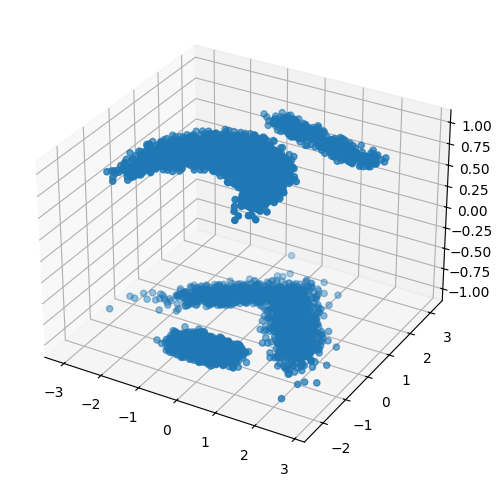

In [13]:
fig=plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter(df['A'], df['B'],df['C'],cmap=df['C'])
# sns.scatterplot(x='A', y='B',data=df,hue='C')
plt.show()

In [3]:
def distance(p,X_train):
    return np.sqrt(np.sum((p-X_train)**2,axis=1))

In [15]:
X = df[['A','B']]
y =df["C"]

In [16]:
k = 2
mean_k = np.random.rand(k,X.shape[1])*5
mean_k
cluster_params = np.zeros(k)
cluster_params

array([0., 0.])

In [7]:
# k_list = [[]]*2
# d = distance(X.values[1],mean_k)
# p =np.argmin(d)
# k_list

# # k_list
# cluster_sum = np.zeros(k)

mean_k = np.random.rand(4,2)*5
# # mean_k = np.zeros((2,2))
# mean_k1 = np.random.rand(3,2)*5
# mean_k
d = distance([1.140,-0.1140],mean_k)
d
            # p = np.argmin(d)

array([1.4685346 , 0.77978622, 1.04562812, 3.31234221])

In [18]:
def KMeans(X,k=4,iterations=1000):
    '''
    first we find the mean matrix from where we found the distance to all othe points
    based on that cluster form 
    and we agun uodate the mean based on the different cluster form
    '''
    #list index item denote to cluster no.
    n_samples = X.shape[0]
    n_feautres = X.shape[1]
    commMap = [0 for i in range(n_samples)]
    
    mean_k = np.random.rand(k,n_feautres)*5
    mean_k1 =  np.random.rand(k,n_feautres)*5
    itr=1
    prev = n_samples
    while itr<iterations:
        itr+=1
        # cluster assignment according to closest distance
        for i in range(n_samples):
            d = distance(X.values[i],mean_k)
            p = np.argmin(d)
            
            commMap[i] = p
        # getting no of clusters items and their sum and updating accordingly
        cluster_params = np.zeros(k)
        mean_k = np.zeros((k,n_feautres))
        for i in range(n_samples):
            cluster_id = commMap[i]
            cluster_params[cluster_id] += 1   #no of samples
            mean_k[cluster_id] += X.values[i]  # updating mean sum 

        
        if np.array_equal(prev, cluster_params):
            print("Mean matrix is " ,mean_k)
            print("No of items in cluster are " ,cluster_params)
            print("No of iterations required",itr)
            return commMap
        
        
        prev = cluster_params
        

        for i in range(k):
            if cluster_params[i]==0: continue
            mean_k[i] = mean_k[i]/cluster_params[i]
    
        print("Mean matrix is " ,mean_k)
        print("No of items in cluster are " ,cluster_params)
        print("No of iterations required",itr)
        
    return commMap

In [19]:
lst = KMeans(X)

Mean matrix is  [[ 2.16417391e+00  1.25871304e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 7.86134454e-06  1.85264706e+00]
 [-5.02927867e-02 -1.18372526e-01]]
No of items in cluster are  [ 115.    0.  238. 4947.]
No of iterations required 2
Mean matrix is  [[ 1.586362    0.7653879 ]
 [ 0.28153196  0.31809414]
 [-0.04594206  1.42157233]
 [-0.43416568 -0.83463569]]
No of items in cluster are  [ 500. 1290.  947. 2563.]
No of iterations required 3
Mean matrix is  [[ 1.43637011  0.52404196]
 [ 0.36183212  0.13160595]
 [-0.32232139  1.29561939]
 [-0.53791266 -0.88321419]]
No of items in cluster are  [ 843. 1052. 1114. 2291.]
No of iterations required 4
Mean matrix is  [[ 1.36044334  0.50601795]
 [ 0.47267962 -0.13077573]
 [-0.43356752  1.18367013]
 [-0.63801097 -0.91247159]]
No of items in cluster are  [1006. 1004. 1252. 2038.]
No of iterations required 5
Mean matrix is  [[ 1.28676364  0.639719  ]
 [ 0.57537319 -0.43482443]
 [-0.47509161  1.11664411]
 [-0.75764851 -0.90934981]]
No of items in 

In [20]:
df['cluster'] =lst
np.unique(lst)

array([0, 1, 2, 3], dtype=int64)

<Axes: >

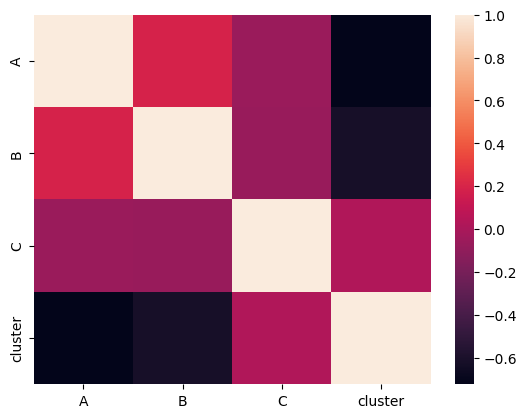

In [21]:
sns.heatmap(df.corr())

<Axes: xlabel='A', ylabel='B'>

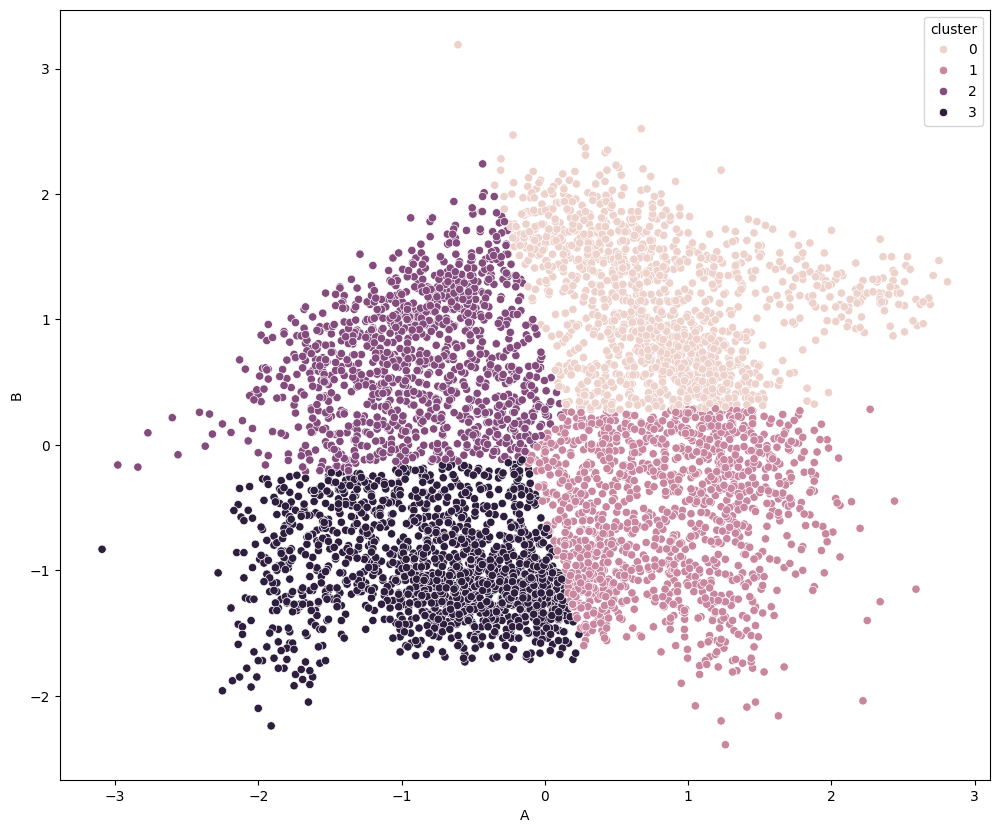

In [22]:
fig = plt.figure(figsize=(12,10))
sns.scatterplot(x='A', y='B',data=df,hue='cluster')

C:\Users\rishabh.garg\AppData\Local\Temp\ipykernel_22712\877926115.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df['A'], df['B'],df['cluster'],cmap=df['cluster'])


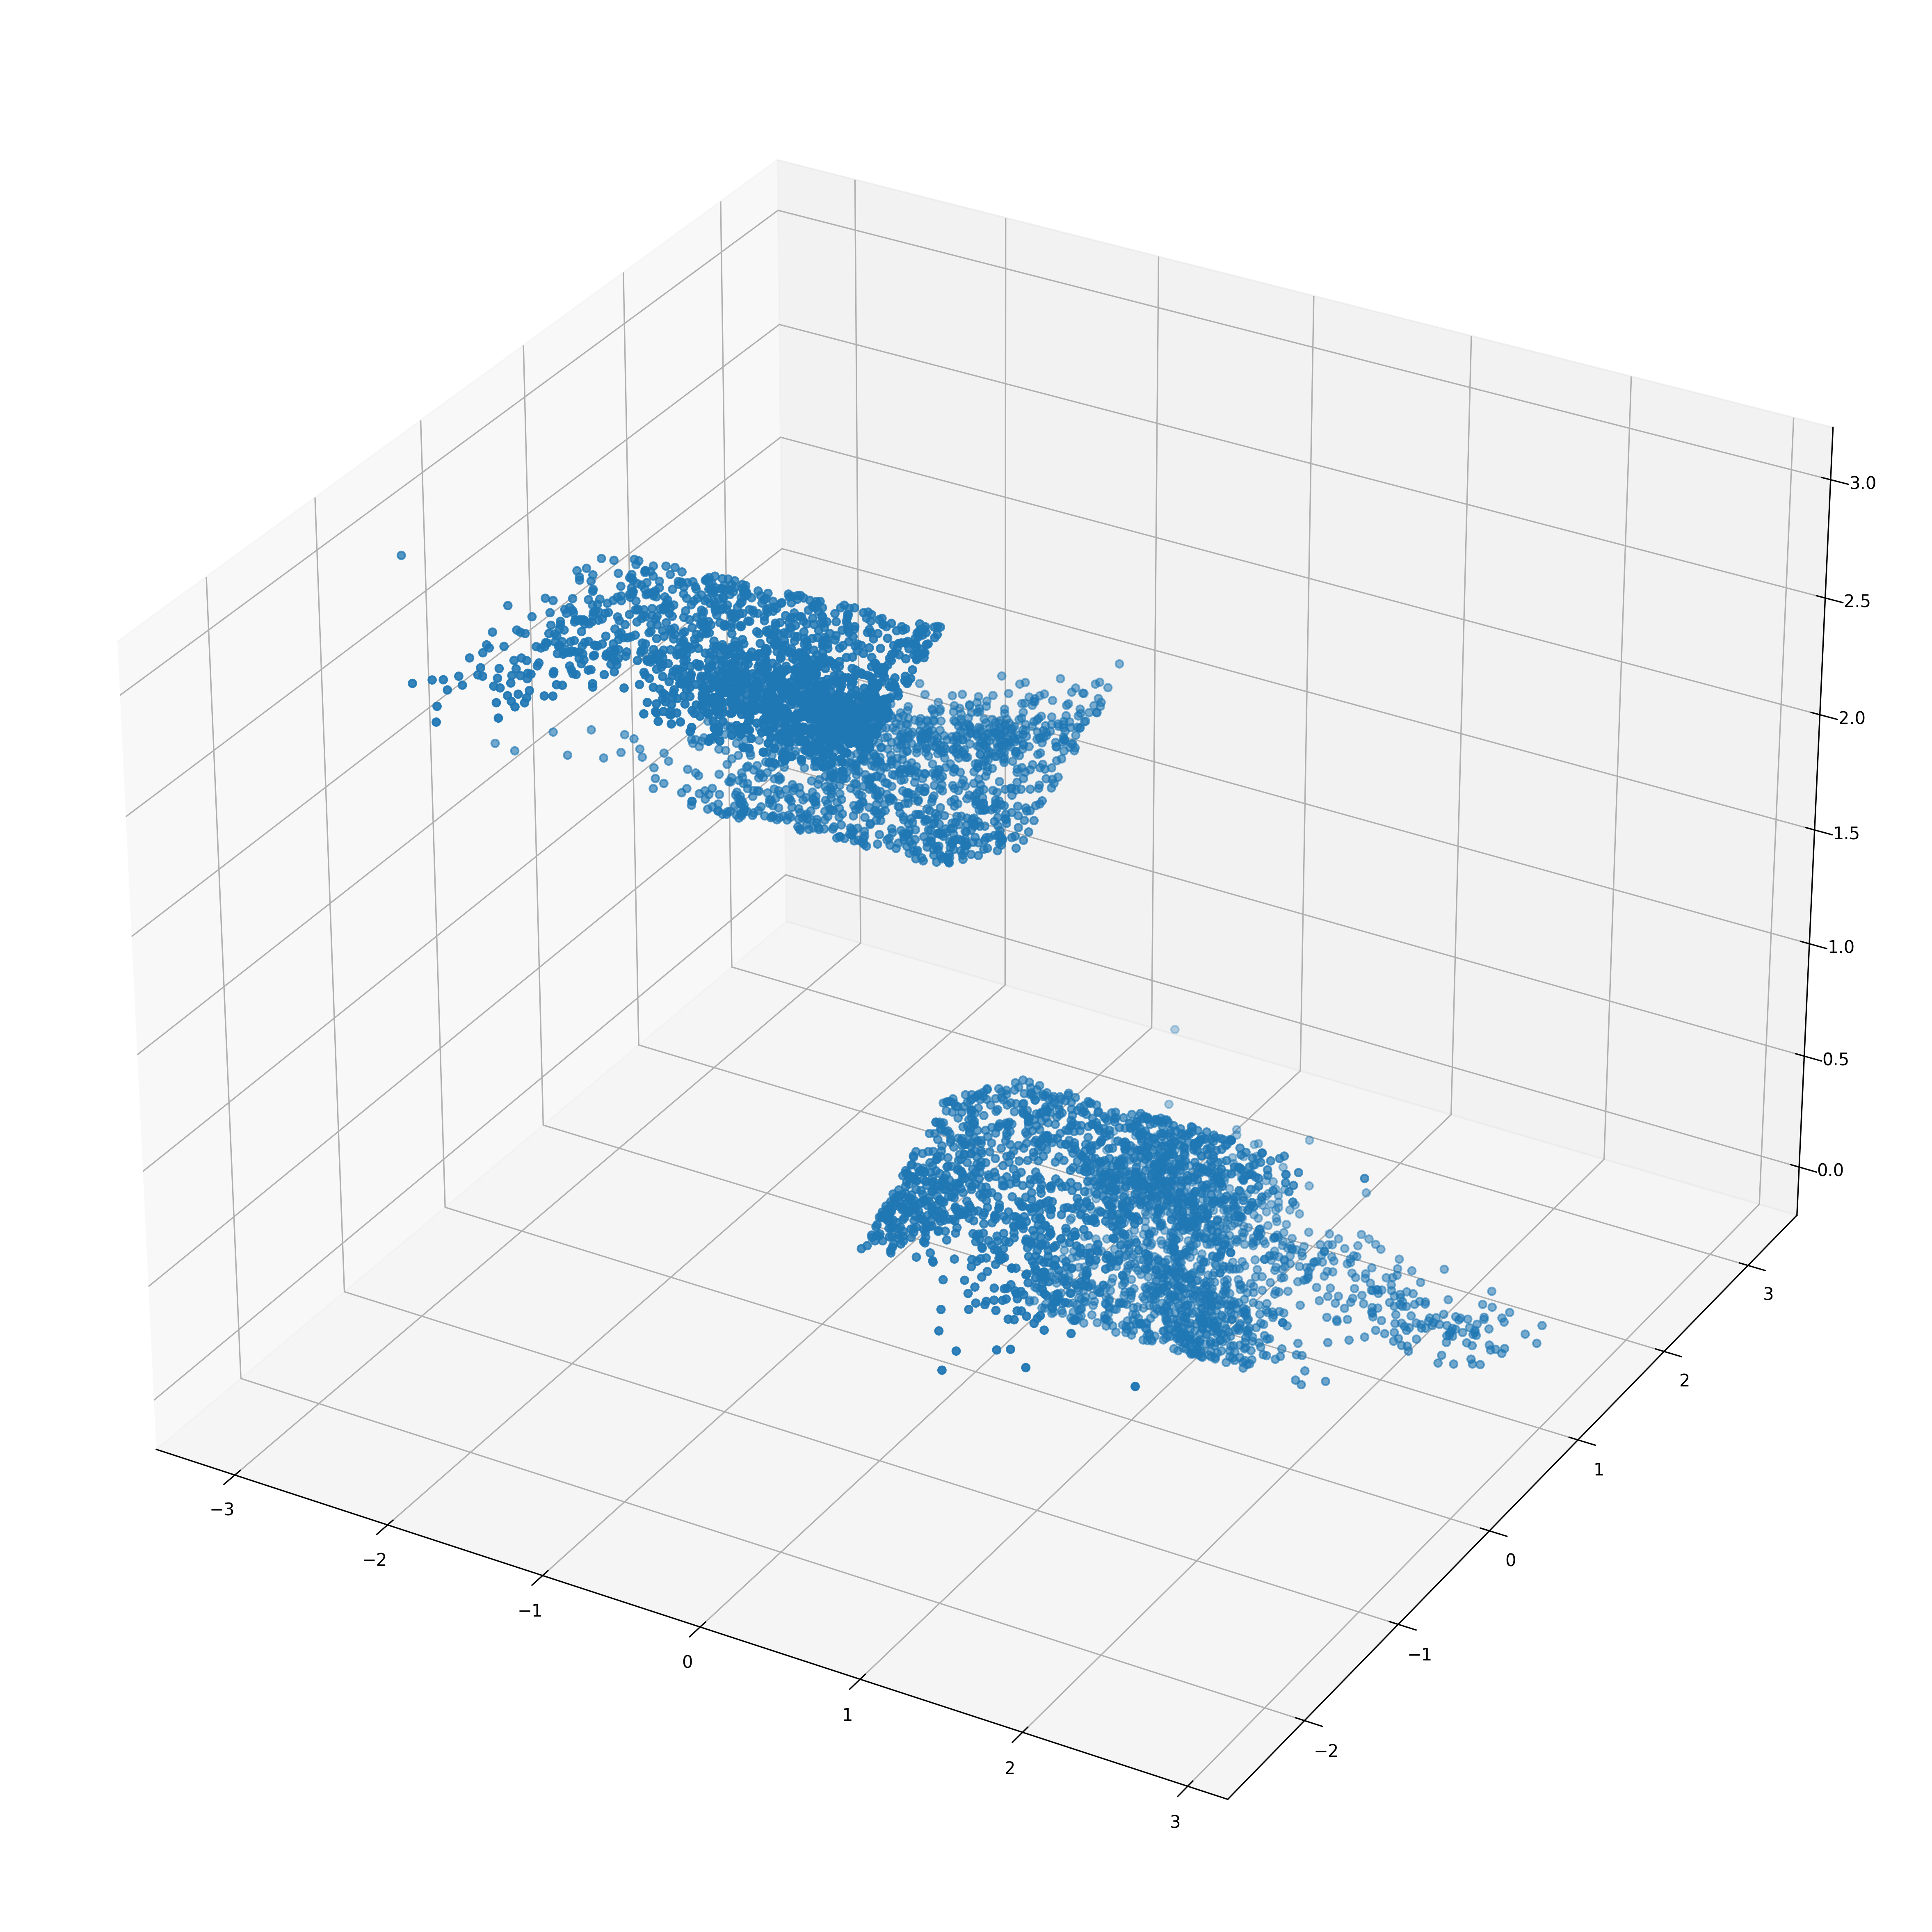

In [23]:
fig = plt.figure(figsize=(20,30),dpi=300)
ax = plt.axes(projection='3d')
ax.scatter(df['A'], df['B'],df['cluster'],cmap=df['cluster'])